# GTSRB 프로젝트

## <span style="font-size:25px">What is GTSRB</span>

<span style="font-size:18px">
GTSRB(German Traffic Sign Recognition Benchmark)는 독일 신경 정보학 연구원들이 교통 
<br>표지판을 예측하기 위해 만든 데이터이다. 일반적으로 32x32 크기를 가진 color 이미지이며, 
<br>43개 교통 표지판과 관련된 약 4만 여개의 이미지를 포함한다.
</span>

## <span style="font=size:25px">Coding</span>

<img src="picture/TF_img_29_1.png" alt="TF_img_29_1" wdith=850>

In [1]:
import os, cv2, glob, random, shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D

In [2]:
ROOT_DIR = './datafile/29_GTSRB_Final_Training_Images/'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'GTSRB/Final_Training/Images/')

In [3]:
image_list, label_list = [], []

image_label_list = os.listdir(DATA_ROOT_DIR)

for label_name in image_label_list:

    # 이미지 파일 읽어오기
    file_path = os.path.join(DATA_ROOT_DIR, label_name)
    img_file_list = glob.glob(file_path+'/*.ppm')

    # 각각의 label directory에 있는 이미지 파일, 즉 .ppm 파일 읽어서 list에 저장
    for img_file in img_file_list:
        try:
            src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
            src_img = cv2.resize(src_img, dsize=(32, 32))
            src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

            image_list.append(src_img), label_list.append(float(label_name))
            
        except Exception as err:
            print(str(err), img_file)
            continue

In [4]:
x_train, t_train = np.array(image_list).astype('float32'), np.array(label_list).astype('float32')

In [5]:
s = np.arange(len(x_train))     # => [0 1 2... 39206 39207 39208]
np.random.shuffle(s)
x_train = x_train[s]
t_train = t_train[s]

SPLIT_RATIO = 0.2
SPLIT_NUMS = int(SPLIT_RATIO*len(x_train))

x_test = x_train[:SPLIT_NUMS]
t_test = t_train[:SPLIT_NUMS]

x_train = x_train[SPLIT_NUMS:]
t_train = t_train[SPLIT_NUMS:]

In [6]:
x_train, x_test = x_train.astype(np.float32) / 255.0, x_test.astype(np.float32) / 255.0

print(f'train shape: {x_train.shape}, test shape: {x_test.shape}', 
      f'\ntrain label shape: {t_train.shape}, test label shape: {t_test.shape}')

train shape: (31368, 32, 32, 3), test shape: (7841, 32, 32, 3) 
train label shape: (31368,), test label shape: (7841,)


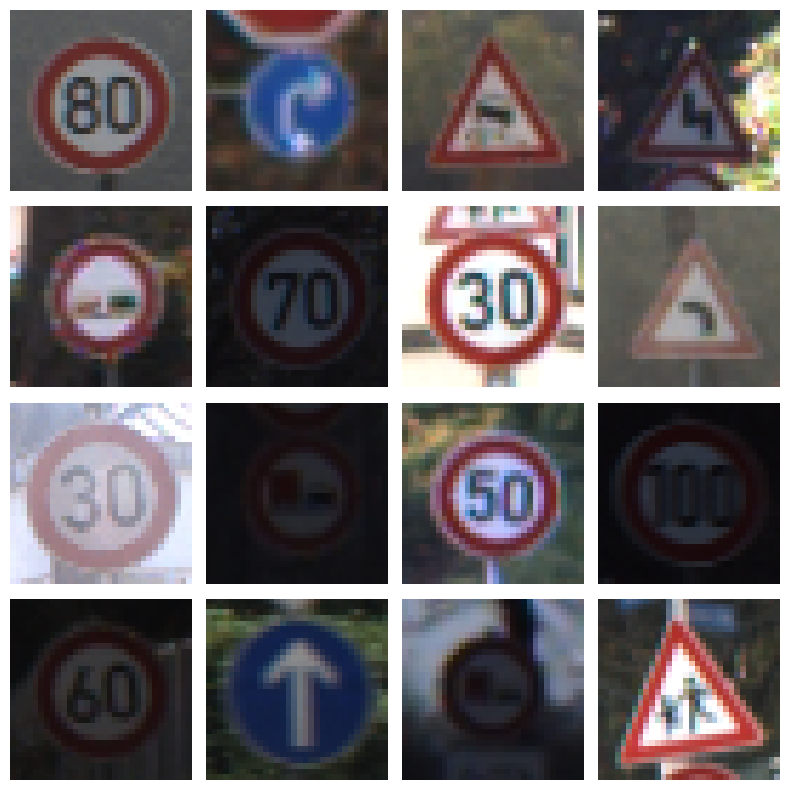

In [8]:
random_idx = np.random.randint(0, len(x_train), 16)     # 1 ~ 31,368 중 16개의 train 데이터 추출
plt.figure(figsize=(8, 8))
for pos in range(len(random_idx)):
    plt.subplot(4, 4, pos+1)
    plt.axis('off')
    train_img_idx = random_idx[pos]
    plt.imshow(x_train[train_img_idx])

plt.tight_layout()
plt.show()

In [13]:
n_classes = len(os.listdir(DATA_ROOT_DIR))

model = Sequential([
    Conv2D(input_shape=(32, 32, 3), kernel_size=(3, 3), filters=32, activation='relu'), 
    Conv2D(kernel_size=(3, 3), filters=64, activation='relu'), 
    MaxPool2D(pool_size=(2, 2)), 
    Flatten(), 
    Dense(256, activation='relu'), 
    Dropout(0.5), 
    Dense(n_classes, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               3211520   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

hist = model.fit(x_train, t_train, batch_size=32, epochs=30, 
                 validation_data=(x_test, t_test), callbacks=[stopping])

Epoch 1/30
981/981 [==============================] - 18s 6ms/step - loss: 1.0457 - accuracy: 0.7085 - val_loss: 0.1743 - val_accuracy: 0.9617
Epoch 2/30
981/981 [==============================] - 5s 5ms/step - loss: 0.2519 - accuracy: 0.9254 - val_loss: 0.0722 - val_accuracy: 0.9850
Epoch 3/30
981/981 [==============================] - 5s 6ms/step - loss: 0.1532 - accuracy: 0.9527 - val_loss: 0.0572 - val_accuracy: 0.9864
Epoch 4/30
981/981 [==============================] - 6s 6ms/step - loss: 0.1110 - accuracy: 0.9648 - val_loss: 0.0384 - val_accuracy: 0.9918
Epoch 5/30
981/981 [==============================] - 6s 6ms/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.0377 - val_accuracy: 0.9915
Epoch 6/30
981/981 [==============================] - 6s 6ms/step - loss: 0.0690 - accuracy: 0.9779 - val_loss: 0.0315 - val_accuracy: 0.9907
Epoch 7/30
981/981 [==============================] - 6s 6ms/step - loss: 0.0541 - accuracy: 0.9823 - val_loss: 0.0280 - val_accuracy: 0.9944
Epoch

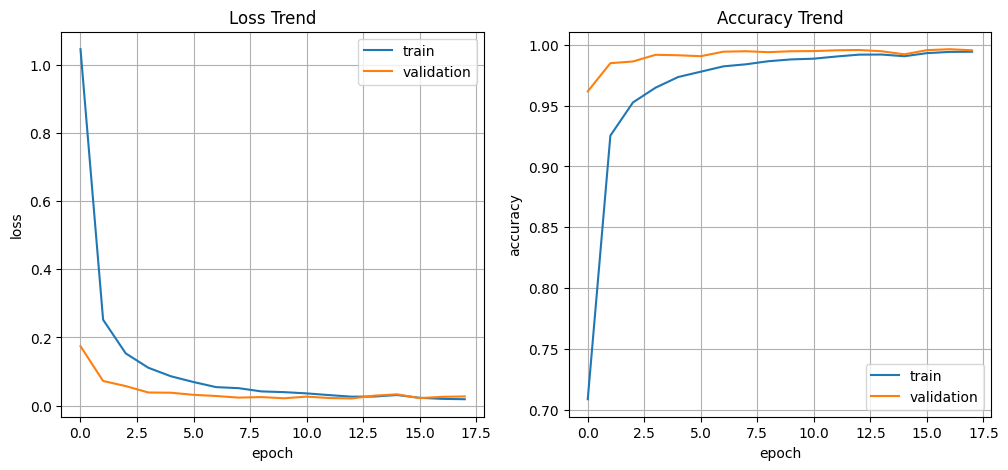

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Loss Trend')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Accuracy Trend')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend(loc='best')
plt.grid()

plt.show()